In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import plot_analysis as pa
import os

In [2]:
DATA_PATH = r'C:\Users\matte\Data Science\Tesi\experiment'

### Turing Analysis

We look for statistic of each experiment. 
The core point is to underline a path of reason, is more likely to select a journalist, the a.i. or their selection is better near 50%

In [3]:
turing = pd.read_csv(os.path.join(DATA_PATH,'turing_results.csv'))

In [4]:
turing.head(0)

,pool,player_name,option_1,option_2,model_prediction,response_1,response_2,response_3,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14


In [5]:
turing = turing[turing['pool'].notna()]
turing = turing.loc[:, ~turing.columns.str.contains('^Unnamed')]

In [6]:
turing

,pool,player_name,option_1,option_2,model_prediction,response_1,response_2,response_3
0,pool_1,"IMMOBILE (SS Lazio, Attaccante)",5.0,5.5,5.5,5.0,5.5,5.0
1,pool_1,"CAICEDO (SS Lazio, Attaccante)",6.0,6.5,6.0,6.5,6.5,6.0
2,pool_1,"LUIS ALBERTO (SS Lazio, Centrocampista)",5.5,5.0,5.5,5.5,5.5,5.0
3,pool_1,"WALLACE (SS Lazio, Difensore)",3.0,4.5,4.5,4.5,4.5,3.0
4,pool_1,"GOMEZ A (Atalanta Bergamasca Calcio, Attaccante)",7.0,7.5,7.0,7.0,7.5,7.0
...,...,...,...,...,...,...,...,...
63,pool_4,"CAPUANO (Frosinone Calcio, Difensore)",5.0,5.5,5.5,5.0,5.5,5.5
64,pool_4,"KOLAROV (AS Roma, Difensore)",6.0,5.5,6.0,6.0,5.5,5.5
65,pool_4,"MANOLAS (AS Roma, Difensore)",6.5,6.0,6.0,6.0,6.0,6.0
66,pool_4,"DZEKO (AS Roma, Attaccante)",8.0,7.5,7.5,8.0,7.5,8.0


In [7]:
def percentage(part, whole):
    return round(100 * float(part)/float(whole), 1)

def compute_values_for_total_bar_chart(turing):
    '''
    Plot a pie chart, from the turing experiment dataset in which there is the difference between AI recognized and AI not recognized
    '''
    # Data to plot
    
    labels = ['Artificial Journalist', 'Real Journalist']
    colors = ['tab:orange','tab:blue']
    total_exp = 0
    same_as_model = 0
    different_from_model = 0
    for el in turing.values:
        if(float(el[4]) == float(el[5])):
            total_exp += 1
            same_as_model+=1
        else:
            total_exp += 1
            different_from_model += 1
        if(float(el[4]) == float(el[6])):
            total_exp += 1
            same_as_model+=1
        else:
            total_exp += 1
            different_from_model += 1  
        if(float(el[4]) == float(el[7])):
            total_exp += 1
            same_as_model+=1
        else:
            total_exp += 1
            different_from_model += 1
    sizes = [same_as_model, different_from_model]
    sizes = [percentage(same_as_model, same_as_model+different_from_model), percentage(different_from_model, same_as_model+different_from_model)]
    labels[0] = labels[0] + '\n' +str(sizes[0])
    labels[1] = labels[1] + '\n' +str(sizes[1])
    
    x = np.arange(len(labels))  # the label locations
    width = 0.30  # the width of the bars
    
    fig, ax = plt.subplots(figsize=(6,6))
    plt.bar(x, sizes, color = colors, width=width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Recognition (%)', fontsize=20, labelpad=15)
    #ax.set_title('Recognition of Artificial Intelligence Ratings')
    ax.set_xticks(x)
    ax.set_yticklabels([0,10,20,30,40,50], fontsize=15)
    ax.set_xticklabels(labels, fontsize=20)
    
    plt.tight_layout()
    
    plt.savefig('img/recognition_total.pdf')

    plt.show()

Plot a pie chart, this allow us to understand in which distribution the partecipants were able to recognize the AI ratings

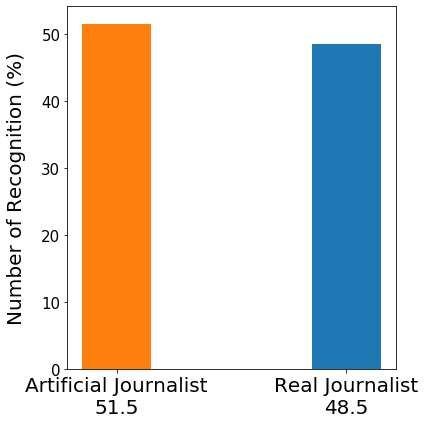

In [8]:
compute_values_for_total_bar_chart(turing)

In [9]:
def return_metrics_for_role(turing):
    '''
    function, that extract from the turing experiment dataset result, metrics for each role.
    Return a dictionary structured as subdictonary 
    {
    total : ...
    A : ...
    C : ...
    D : ...
    P : ...
    }
    '''
    total_exp = 0
    same_as_model = 0
    different_from_model = 0
    total_exp_att = 0
    same_as_model_att = 0
    different_from_model_att = 0
    total_exp_mid = 0
    same_as_model_mid = 0
    different_from_model_mid = 0
    total_exp_def = 0
    same_as_model_def = 0
    different_from_model_def  = 0
    total_exp_gk = 0
    same_as_model_gk = 0
    different_from_model_gk = 0
    
    labels = ['Artificial Journalist', 'Real Journalist']
    colors = ['blue','orange']
    
    for el in turing.values:
        last = len(el[1].split())
        role = el[1].split()[last -1].replace(')', '')
        if(float(el[4]) == float(el[5])):
            if(role == 'Attaccante'):
                total_exp += 1
                same_as_model+=1
                total_exp_att += 1
                same_as_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                same_as_model += 1
                total_exp_mid += 1
                same_as_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                same_as_model += 1
                total_exp_def += 1
                same_as_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                same_as_model += 1
                total_exp_gk += 1
                same_as_model_gk += 1        
        else:
            if(role == 'Attaccante'):
                total_exp += 1
                different_from_model+=1
                total_exp_att += 1
                different_from_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                different_from_model += 1
                total_exp_mid += 1
                different_from_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                different_from_model += 1
                total_exp_def += 1
                different_from_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                different_from_model += 1
                total_exp_gk += 1
                different_from_model_gk += 1  
        if(float(el[4]) == float(el[6])):
            if(role == 'Attaccante'):
                total_exp += 1
                same_as_model+=1
                total_exp_att += 1
                same_as_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                same_as_model += 1
                total_exp_mid += 1
                same_as_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                same_as_model += 1
                total_exp_def += 1
                same_as_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                same_as_model += 1
                total_exp_gk += 1
                same_as_model_gk += 1        
        else:
            if(role == 'Attaccante'):
                total_exp += 1
                different_from_model+=1
                total_exp_att += 1
                different_from_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                different_from_model += 1
                total_exp_mid += 1
                different_from_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                different_from_model += 1
                total_exp_def += 1
                different_from_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                different_from_model += 1
                total_exp_gk += 1
                different_from_model_gk += 1   
        if(float(el[4]) == float(el[7])):
            if(role == 'Attaccante'):
                total_exp += 1
                same_as_model+=1
                total_exp_att += 1
                same_as_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                same_as_model += 1
                total_exp_mid += 1
                same_as_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                same_as_model += 1
                total_exp_def += 1
                same_as_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                same_as_model += 1
                total_exp_gk += 1
                same_as_model_gk += 1        
        else:
            if(role == 'Attaccante'):
                total_exp += 1
                different_from_model+=1
                total_exp_att += 1
                different_from_model_att += 1
            if(role == 'Centrocampista'):
                total_exp += 1
                different_from_model += 1
                total_exp_mid += 1
                different_from_model_mid += 1
            if(role == 'Difensore'):
                total_exp += 1
                different_from_model += 1
                total_exp_def += 1
                different_from_model_def += 1
            if(role == 'Portiere'):
                total_exp += 1
                different_from_model += 1
                total_exp_gk += 1
                different_from_model_gk += 1                      
    results_per_role = {}
    results_per_role['total'] = {}
    results_per_role['total']['total_number'] = total_exp
    results_per_role['total']['AI find'] = same_as_model
    results_per_role['total']['AI not find'] = different_from_model
    results_per_role['total']['sizes'] = [same_as_model, different_from_model]
    results_per_role['total']['labels'] = [labels[0] + '\n' +str(results_per_role['total']['sizes'][0]), labels[1] + '\n' +str(results_per_role['total']['sizes'][1])]
    
    results_per_role['A'] = {}
    results_per_role['A']['total_number'] = total_exp_att
    results_per_role['A']['AI find'] = same_as_model_att
    results_per_role['A']['AI not find'] = different_from_model_att
    results_per_role['A']['sizes'] = [same_as_model_att, different_from_model_att]
    results_per_role['A']['labels'] = [labels[0] + '\n' +str(results_per_role['A']['sizes'][0]), labels[1] + '\n' +str(results_per_role['A']['sizes'][1])]
    
    results_per_role['C'] = {}
    results_per_role['C']['total_number'] = total_exp_mid
    results_per_role['C']['AI find'] = same_as_model_mid
    results_per_role['C']['AI not find'] = different_from_model_mid
    results_per_role['C']['sizes'] = [same_as_model_mid, different_from_model_mid]
    results_per_role['C']['labels'] = [labels[0] + '\n' +str(results_per_role['C']['sizes'][0]), labels[1] + '\n' +str(results_per_role['C']['sizes'][1])]
    
    results_per_role['D'] = {}
    results_per_role['D']['total_number'] = total_exp_def
    results_per_role['D']['AI find'] = same_as_model_def
    results_per_role['D']['AI not find'] = different_from_model_def
    results_per_role['D']['sizes'] = [same_as_model_def, different_from_model_def]
    results_per_role['D']['labels'] = [labels[0] + '\n' +str(results_per_role['D']['sizes'][0]), labels[1] + '\n' +str(results_per_role['D']['sizes'][1])]
    
    results_per_role['P'] = {}
    results_per_role['P']['total_number'] = total_exp_gk
    results_per_role['P']['AI find'] = same_as_model_gk
    results_per_role['P']['AI not find'] = different_from_model_gk
    results_per_role['P']['sizes'] = [same_as_model_gk, different_from_model_gk]
    results_per_role['P']['labels'] = [labels[0] + '\n' +str(results_per_role['P']['sizes'][0]), labels[1] + '\n' +str(results_per_role['P']['sizes'][1])]
    
    
    results_per_role['All'] = {}
    results_per_role['All']['total_number'] = total_exp_att + total_exp_mid + total_exp_def + total_exp_gk
    results_per_role['All']['AI find'] = same_as_model_att + same_as_model_mid + same_as_model_def + same_as_model_gk
    results_per_role['All']['AI not find'] = different_from_model_att + different_from_model_mid + different_from_model_def + different_from_model_gk
    results_per_role['All']['sizes'] = [same_as_model_att + same_as_model_mid + same_as_model_def + same_as_model_gk, different_from_model_att + different_from_model_mid + different_from_model_def + different_from_model_gk]
    results_per_role['All']['labels'] = [labels[0] + '\n' +str(results_per_role['All']['sizes'][0]), labels[1] + '\n' +str(results_per_role['All']['sizes'][1])]
    return results_per_role    

In [151]:
def percentage(part, whole):
    return round(100 * float(part)/float(whole), 1)

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)
    recon = 0
    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        if(recon == 1):
            axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        else:
            axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color, hatch='//'))
            
        cum_size += row_data
        recon += 1

    if category_labels:
        plt.xticks(ind, category_labels, fontsize=15, rotation=20, ha='right')

    if y_label:
        plt.ylabel(y_label, fontsize=15)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                if(h != 0):
                    plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center", fontsize=15, weight='bold')

def bar_chart_per_role(res):
    '''
    Function to plot results of role computation in order to understand which role is better distingushable between 
    real one and fake one
    '''
    labels = ['All Roles', '', 'Forwards', 'Midfielders', 'Defenders', 'Goalkeepers']
    role_ai_id = [res['All']['AI find'], 0, res['A']['AI find'], res['C']['AI find'], res['D']['AI find'], res['P']['AI find']]
    role_ai_not_id = [res['All']['AI not find'], 0 ,res['A']['AI not find'], res['C']['AI not find'], res['D']['AI not find'], res['P']['AI not find']]
    
    roles_ai_id = [percentage(role_ai_id[0], role_ai_id[0] + role_ai_not_id[0]), 0 ,percentage(role_ai_id[2], role_ai_id[2] + role_ai_not_id[2]),
                  percentage(role_ai_id[3], role_ai_id[3] + role_ai_not_id[3]), percentage(role_ai_id[4], role_ai_id[4] + role_ai_not_id[4]),
                  percentage(role_ai_id[5], role_ai_id[5] + role_ai_not_id[5])]
    roles_ai_not_id = [percentage(role_ai_not_id[0], role_ai_id[0] + role_ai_not_id[0]), 0 ,percentage(role_ai_not_id[2], role_ai_id[2] + role_ai_not_id[2]),
                      percentage(role_ai_not_id[3], role_ai_id[3] + role_ai_not_id[3]), percentage(role_ai_not_id[4], role_ai_id[4] + role_ai_not_id[4]),
                      percentage(role_ai_not_id[5], role_ai_id[5] + role_ai_not_id[5])]
    
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    ############################
    #STRUCTURED AS CLOSED BAR CHART
    ################################
    '''
    fig, ax = plt.subplots(figsize=(9,6))
    rects1 = ax.bar(x - width/2, roles_ai_id, width, label='Artificial Journalist', color='#D51B1B', hatch='//')
    rects2 = ax.bar(x + width/2, roles_ai_not_id, width, label='Real Journalist', color=(0, 0, 0, 0.6))
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Recognition (%)', fontsize=25, labelpad=15)
    #ax.set_title('Votes by Role by Artifical Rates Recognition')
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=16)
    ax.set_yticklabels([0,20,40,60,80,100], fontsize=15)
    ax.legend(fontsize=15)
    #ax.set_xlabel('Roles', fontsize=25)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if(height != 0):
                ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',fontsize=14)


    autolabel(rects1)
    autolabel(rects2)

    plt.ylim(0,100)
    '''
    
    ############################
    #STRUCTURED AS Stacked Bar chart
    ################################
    '''
    data = [
    [percentage(role_ai_id[0], role_ai_id[0] + role_ai_not_id[0]), 0 ,percentage(role_ai_id[2], role_ai_id[2] + role_ai_not_id[2]),
                  percentage(role_ai_id[3], role_ai_id[3] + role_ai_not_id[3]), percentage(role_ai_id[4], role_ai_id[4] + role_ai_not_id[4]),
                  percentage(role_ai_id[5], role_ai_id[5] + role_ai_not_id[5])],
    [percentage(role_ai_not_id[0], role_ai_id[0] + role_ai_not_id[0]), 0 ,percentage(role_ai_not_id[2], role_ai_id[2] + role_ai_not_id[2]),
                      percentage(role_ai_not_id[3], role_ai_id[3] + role_ai_not_id[3]), percentage(role_ai_not_id[4], role_ai_id[4] + role_ai_not_id[4]),
                      percentage(role_ai_not_id[5], role_ai_id[5] + role_ai_not_id[5])]]
    
    series_labels = ['Artificial Journalist', 'Real Journalist']
    category_labels = ['Rating Only', 'Ratings + Explanation', 'Explanation Only']
    
    plt.figure(figsize=(9,6))
    
    plot_stacked_bar(
        data, 
        series_labels, 
        category_labels=labels, 
        show_values=True, 
        value_format="{:.1f}",
        colors=['#D51B1B', (0, 0, 0, 0.6)],
        y_label="Number of Recognition (%)"
    )
    plt.axhline(y=50,color='red', label='50%')
    #plt.title('First Scenario, Human Evaluation Knowing only AI Prediction')
    #plt.xlabel('Scenario', fontsize=20)
    plt.yticks([0,20,40,60,80,100], fontsize=15)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fontsize=13)
    plt.grid(False)  
    '''
    ############################
    #STRUCTURED AS Single barchart
    ################################
    
    fig, ax = plt.subplots(figsize=(9,6))
    rects1 = ax.bar(x[0], roles_ai_id[0], width, label='Artificial Journalist', color='#D51B1B', hatch='//')
    rects2 = ax.bar(x[1:], roles_ai_id[1:], width, label='Artificial Journalist', color='#D51B1B')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Artificial rating detected (%)', fontsize=25, labelpad=15)
    #ax.set_title('Votes by Role by Artifical Rates Recognition')
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=16)
    #ax.set_yticklabels([0,20,40,60,80,100], fontsize=15)
    ax.xaxis.get_major_ticks()[1].set_visible(False)
    #ax.set_xlabel('Roles', fontsize=25)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if(height != 0):
                ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',fontsize=14)

    autolabel(rects1)
    autolabel(rects2)
    plt.ylim(0,max(roles_ai_id) + 10)
    
    plt.axvline(x=x[1], linestyle='--', color='black', lw=4)
    
    plt.tight_layout()
    plt.savefig('img/recognition_role.pdf')

    plt.show()

In [152]:
azz = return_metrics_for_role(turing)

In [153]:
azz

{'total': {'total_number': 204,
  'AI find': 105,
  'AI not find': 99,
  'sizes': [105, 99],
  'labels': ['Artificial Journalist\n105', 'Real Journalist\n99']},
 'A': {'total_number': 57,
  'AI find': 31,
  'AI not find': 26,
  'sizes': [31, 26],
  'labels': ['Artificial Journalist\n31', 'Real Journalist\n26']},
 'C': {'total_number': 54,
  'AI find': 25,
  'AI not find': 29,
  'sizes': [25, 29],
  'labels': ['Artificial Journalist\n25', 'Real Journalist\n29']},
 'D': {'total_number': 84,
  'AI find': 46,
  'AI not find': 38,
  'sizes': [46, 38],
  'labels': ['Artificial Journalist\n46', 'Real Journalist\n38']},
 'P': {'total_number': 9,
  'AI find': 3,
  'AI not find': 6,
  'sizes': [3, 6],
  'labels': ['Artificial Journalist\n3', 'Real Journalist\n6']},
 'All': {'total_number': 204,
  'AI find': 105,
  'AI not find': 99,
  'sizes': [105, 99],
  'labels': ['Artificial Journalist\n105', 'Real Journalist\n99']}}

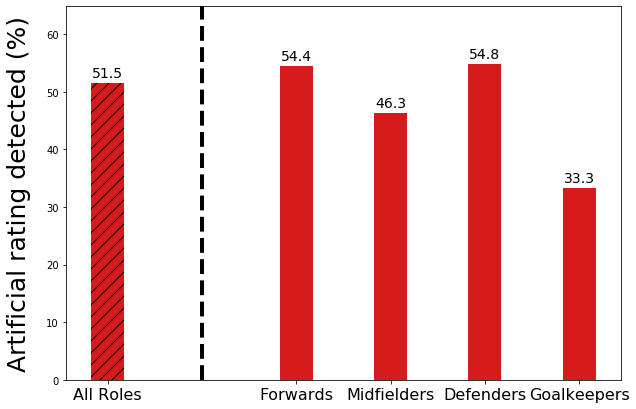

In [154]:
bar_chart_per_role(azz)

### Treatment Analysis

We look for similarity to A.I. based on scenario we give to human evaluator

In [130]:
treatment = pd.read_csv(os.path.join(DATA_PATH, 'treatment_results.csv'), encoding='latin-1')

In [131]:
treatment

,pool,player_name,scenarios,res_1,res_2,res_3,prediction,journalist,match
0,pool_1,"PAROLO (SS Lazio, Centrocampista)",Il voto assegnato al giocatore è 6.5 perchè: N...,6.5,7.0,6.5,6.5,6.5,1
1,pool_1,"LUIS ALBERTO (SS Lazio, Centrocampista)",Il voto assegnato al giocatore è 5.5. Qual è i...,5.0,5.5,5.5,5.5,5.0,1
2,pool_1,"STRAKOSHA (SS Lazio, Portiere)",Informazioni Utili: Numero dei goal sofferti d...,6.0,6.0,4,6.5,6.0,1
3,pool_1,"BASTOS (SS Lazio, Difensore)",Il voto assegnato al giocatore è 5.0 perchè: N...,5.5,5.5,5.5,5.0,5.0,1
4,pool_1,"IMMOBILE (SS Lazio, Attaccante)",Il voto assegnato al giocatore è 5.5. Qual è i...,6.0,6.5,5.5,5.5,5.0,1
...,...,...,...,...,...,...,...,...,...
95,pool_4,"DE ROSSI (AS Roma, Centrocampista)",Il voto assegnato al giocatore è 6.0. Qual è i...,6.0,6.0,6,6.0,6.0,10
96,pool_4,"PELLEGRINI LO (AS Roma, Centrocampista)",Informazioni Utili: Numero di goal fatti 1 (me...,6.5,6.5,6,7.0,7.0,10
97,pool_4,"OLSEN (AS Roma, Portiere)",Il voto assegnato al giocatore è 6.5. Qual è i...,5.5,5.5,5.5,6.5,5.5,10
98,pool_4,"KOLAROV (AS Roma, Difensore)",Il voto assegnato al giocatore è 6.0 perchè: D...,5.5,5.5,5,6.0,5.5,10


In [132]:
def convert_dots(treatment):
    '''
    This function convert all, into .
    '''
    res1 = []
    res2 = []
    res3 = []
    for el in treatment.values:
        if(',' in str(el[3])):
            res1.append(float(el[3].replace(',', '.')))
        else:
            res1.append(float(el[3]))
        if(',' in str(el[4])):
            res2.append(float(el[4].replace(',', '.')))
        else:
            res2.append(float(el[4]))
        if(',' in str(el[5])):
            res3.append(float(el[5].replace(',', '.')))
        else:
            res3.append(float(el[5]))
    treatment['res_1'] = res1
    treatment['res_2'] = res2
    treatment['res_3'] = res3
    
    return treatment

In [133]:
treatment = convert_dots(treatment)

In [134]:
def treatment_statistics(tratment):
    '''
    Plot a pie chart, from the turing experiment dataset in which there is the difference between AI recognized and AI not recognized
    '''
    # Data to plot
    labels = ['AI identified', 'AI not identfied']
    colors = ['gold','lightskyblue']
    total_exp = 0
    same_as_model = 0
    different_from_model = 0
    for el in treatment.values:
        if(el[0] != 'pool_4'):
            if(float(el[6]) == float(el[3])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1
            if(float(el[6]) == float(el[4])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1  
            if(float(el[6]) == float(el[5])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1
        else:
            if(float(el[6]) == float(el[3])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1
            if(float(el[6]) == float(el[4])):
                total_exp += 1
                same_as_model+=1
            else:
                total_exp += 1
                different_from_model += 1
    sizes = [same_as_model, different_from_model]
    labels[0] = labels[0] + '\n' +str(sizes[0])
    labels[1] = labels[1] + '\n' +str(sizes[1])
    # Plot
    plt.pie(sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.show()

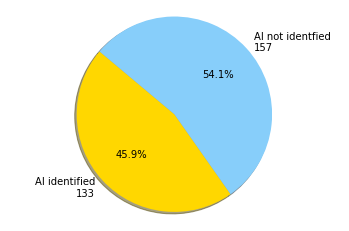

In [135]:
treatment_statistics(treatment)

In [136]:
# 1 scenario, avevano solo il voto (quante volte hanno cambiato il voto perche hanno visto il voto della macchina)
# 2 scenario, avevano voto piu scenario (quante volte hanno cambiato il voto perche hanno visto il nome della macchina)
# 3 scenario, avevano solo lo scenario (vedo per ogni voto se e diverso, o uguale a quella della macchina, se il ragionamento macchina e umano hanno portato allo stesso risultato)

#### 1_SCENARIO: ONLY THE MARK

In [137]:
def percentage(part, whole):
    return 100 * float(part)/float(whole)

def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)
    recon = 0
    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        if(recon == 1):
            axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        else:
            axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color, hatch='//'))
            
        cum_size += row_data
        recon += 1

    if category_labels:
        plt.xticks(ind, category_labels, fontsize=15, rotation=20, ha='right')

    if y_label:
        plt.ylabel(y_label, fontsize=15)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center", fontsize=15, weight='bold')

def treatment_statistic(treatment):
    not_same_to_prediction_1 = 0
    not_same_to_journalist_1 = 0
    same_to_journalist_1 = 0
    same_to_prediction_1 = 0 
    for el in treatment.values:
        if(len(el[2]) == 142):
            if(float(el[3]) != float(el[6])):
                not_same_to_prediction_1 += 1
            else:
                same_to_prediction_1 += 1
            if(float(el[4]) != float(el[6])):
                not_same_to_prediction_1 += 1
            else:
                same_to_prediction_1 += 1
            if(float(el[5]) != float(el[6])):
                not_same_to_prediction_1 += 1
            else:
                same_to_prediction_1 += 1
            if(float(el[3]) != float(el[7])):
                not_same_to_journalist_1 += 1
            else:
                same_to_journalist_1 += 1
            if(float(el[4]) != float(el[7])):
                not_same_to_journalist_1 += 1
            else:
                same_to_journalist_1 += 1
            if(float(el[5]) != float(el[7])):
                not_same_to_journalist_1 += 1
            else:
                same_to_journalist_1 += 1
    not_same_to_prediction_perc_1 = percentage(not_same_to_prediction_1, not_same_to_prediction_1+same_to_prediction_1)
    same_to_prediction_perc_1 = percentage(same_to_prediction_1, not_same_to_prediction_1+same_to_prediction_1)
    
    not_same_to_journalist_perc_1 = percentage(not_same_to_journalist_1, not_same_to_journalist_1+same_to_journalist_1)
    same_to_journalist_perc_1 = percentage(same_to_journalist_1, not_same_to_journalist_1 + same_to_journalist_1)
    
    not_same_to_prediction_2 = 0
    not_same_to_journalist_2 = 0
    same_to_journalist_2 = 0
    same_to_prediction_2 = 0 
    for el in treatment.values:
        tokens = el[2].split()
        if(len(el[2]) >= 142 and tokens[0] != 'Informazioni'):
            if(float(el[3]) != float(el[6])):
                not_same_to_prediction_2 += 1
            else:
                same_to_prediction_2 += 1
            if(float(el[4]) != float(el[6])):
                not_same_to_prediction_2 += 1
            else:
                same_to_prediction_2 += 1
            if(float(el[5]) != float(el[6])):
                not_same_to_prediction_2 += 1
            else:
                same_to_prediction_2 += 1
            if(float(el[3]) != float(el[7])):
                not_same_to_journalist_2 += 1
            else:
                same_to_journalist_2 += 1
            if(float(el[4]) != float(el[7])):
                not_same_to_journalist_2 += 1
            else:
                same_to_journalist_2 += 1
            if(float(el[5]) != float(el[7])):
                not_same_to_journalist_2 += 1
            else:
                same_to_journalist_2 += 1
    not_same_to_prediction_2_perc = percentage(not_same_to_prediction_2, not_same_to_prediction_2+same_to_prediction_2)
    same_to_prediction_2_perc = percentage(same_to_prediction_2, not_same_to_prediction_2+same_to_prediction_2)
    
    not_same_to_journalist_2_perc = percentage(not_same_to_journalist_2, not_same_to_journalist_2+same_to_journalist_2)
    same_to_journalist_2_perc = percentage(same_to_journalist_2, not_same_to_journalist_2 + same_to_journalist_2)
    
    not_same_to_prediction_3 = 0
    not_same_to_journalist_3 = 0
    same_to_journalist_3 = 0
    same_to_prediction_3 = 0 
    for el in treatment.values:
        tokens = el[2].split()
        if(len(el[2]) >= 142 and tokens[0] == 'Informazioni'):
            if(float(el[3]) != float(el[6])):
                not_same_to_prediction_3 += 1
            else:
                same_to_prediction_3 += 1
            if(float(el[4]) != float(el[6])):
                not_same_to_prediction_3 += 1
            else:
                same_to_prediction_3 += 1
            if(float(el[5]) != float(el[6])):
                not_same_to_prediction_3 += 1
            else:
                same_to_prediction_3 += 1
            if(float(el[3]) != float(el[7])):
                not_same_to_journalist_3 += 1
            else:
                same_to_journalist_3 += 1
            if(float(el[4]) != float(el[7])):
                not_same_to_journalist_3 += 1
            else:
                same_to_journalist_3 += 1
            if(float(el[5]) != float(el[7])):
                not_same_to_journalist_3 += 1
            else:
                same_to_journalist_3 += 1
    not_same_to_prediction_3_perc = percentage(not_same_to_prediction_3, not_same_to_prediction_3+same_to_prediction_3)
    same_to_prediction_3_perc = percentage(same_to_prediction_3, not_same_to_prediction_3+same_to_prediction_3)
    
    not_same_to_journalist_3_perc = percentage(not_same_to_journalist_3, not_same_to_journalist_3+same_to_journalist_3)
    same_to_journalist_3_perc = percentage(same_to_journalist_3, not_same_to_journalist_3 + same_to_journalist_3)
    
    
    data = [
    [same_to_prediction_perc_1, same_to_prediction_2_perc, same_to_prediction_3_perc],
    [not_same_to_prediction_perc_1, not_same_to_prediction_2_perc, not_same_to_prediction_3_perc]]
    
    series_labels = ['Same Rating', 'Different Rating']
    category_labels = ['Rating Only', 'Ratings + Explanation', 'Explanation Only']
    
    plt.figure(figsize=(6,6))
    
    plot_stacked_bar(
        data, 
        series_labels, 
        category_labels=category_labels, 
        show_values=True, 
        value_format="{:.1f}",
        colors=['tab:orange', 'tab:blue'],
        y_label="Difference between A.I. and Human"
    )
    plt.axhline(y=50,color='red', label='50%')
    #plt.title('First Scenario, Human Evaluation Knowing only AI Prediction')
    plt.xlabel('Scenario', fontsize=20)
    plt.yticks([0,20,40,60,80,100], fontsize=15)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fontsize=13)
    plt.grid(False)
    plt.tight_layout()
    plt.savefig('img/treatment_results.pdf')
    plt.show()

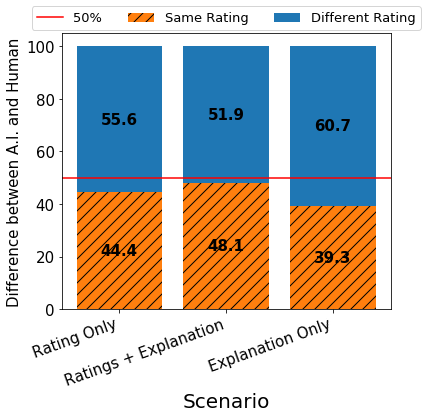

In [138]:
treatment_statistic(treatment)

In [23]:
def extract_stdv_and_mean(listvalues, listnumbers):
    '''
    '''
    reconfiguredvalues = []
    for i in range(0, len(listvalues)):
        reconfiguredvalues.append(percentage(listvalues[i], listnumbers[i]))
    return round(statistics.stdev(reconfiguredvalues),2), round(statistics.mean(reconfiguredvalues),2)
    
def table_for_scenario_for_participant_and_match(treatment):
    '''
    return a dataframe in which for total and then for each scenario,
    compute the mean and std per participant and per match
    
    Param:
        treatment df
    Return 
        results df
    '''
    #total part
    tot = {}
    tot['agree part'] = []
    tot['agree match'] = []
    tot['tot num part'] = []
    tot['tot num match'] = []
    #first total computation for participant
    for p in ['pool_1', 'pool_2', 'pool_3', 'pool_4']:
        sub = treatment[treatment['pool'] == p]
        for participant in [1,2,3]:
            agree = 0
            tots = 0
            accessor = 'res_' + str(participant)
            for i, el in sub.iterrows():
                if(el[accessor] == el['prediction']):
                    agree += 1
                tots += 1
            tot['agree part'].append(agree)
            tot['tot num part'].append(tots)
    for p in range(1,11):
        sub = treatment[treatment['match'] == p]
        agree = 0
        tots = 0
        for i, el in sub.iterrows():
                if(el['res_1'] == el['prediction']):
                    agree += 1
                if(el['res_2'] == el['prediction']):
                    agree += 1
                if(el['res_3'] == el['prediction']):
                    agree += 1
                tots += 1
        tot['agree match'].append(agree) 
        tot['tot num match'].append(tots * 3)
    #scenarios
    scen1 = {}
    scen2 = {}
    scen3 = {}
    scen1['agree part'] = []
    scen1['agree match'] = []
    scen2['agree part'] = []
    scen2['agree match'] = []
    scen3['agree part'] = []
    scen3['agree match'] = []
    scen1['total num part'] = []
    scen2['total num part'] = []
    scen3['total num part'] = []
    scen1['total num match'] = []
    scen2['total num match'] = []
    scen3['total num match'] = []
    #first total computation for participant
    for p in ['pool_1', 'pool_2', 'pool_3', 'pool_4']:
        sub = treatment[treatment['pool'] == p]
        for participant in [1,2,3]:
            agree1 = 0
            agree2 = 0
            agree3 = 0
            tot1 = 0
            tot2 =0
            tot3 =0
            accessor = 'res_' + str(participant)
            for i, el in sub.iterrows():
                if(len(el['scenarios']) == 142):
                    tot1 += 1
                if(len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    tot2 += 1
                if(len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    tot3 += 1               
                #first scenario
                if(el[accessor] == el['prediction'] and len(el['scenarios']) == 142):
                    agree1 += 1
                #second scenario
                if(el[accessor] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    agree2 += 1
                #third scenario
                if(el[accessor] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    agree3 += 1
                
            scen1['agree part'].append(agree1)
            scen2['agree part'].append(agree2)
            scen3['agree part'].append(agree3)
            scen1['total num part'].append(tot1)
            scen2['total num part'].append(tot2)
            scen3['total num part'].append(tot3)
    for p in range(1,11):
        sub = treatment[treatment['match'] == p]
        agree1 = 0
        agree2 = 0
        agree3 = 0
        tot1 = 0
        tot2 = 0
        tot3 = 0
        for i, el in sub.iterrows():
                if(len(el['scenarios']) == 142):
                    tot1 += 1
                if(len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    tot2 += 1
                if(len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    tot3 += 1               
                #first scenario
                if(el['res_1'] == el['prediction'] and len(el['scenarios']) == 142):
                    agree1 += 1
                #second scenario
                if(el['res_1'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    agree2 += 1
                #third scenario
                if(el['res_1'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    agree3 += 1
                 #first scenario
                if(el['res_2'] == el['prediction'] and len(el['scenarios']) == 142):
                    agree1 += 1
                #second scenario
                if(el['res_2'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    agree2 += 1
                #third scenario
                if(el['res_2'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    agree3 += 1
                 #first scenario
                if(el['res_3'] == el['prediction'] and len(el['scenarios']) == 142):
                    agree1 += 1
                #second scenario
                if(el['res_3'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] != 'Informazioni'):
                    agree2 += 1
                #third scenario
                if(el['res_3'] == el['prediction'] and len(el['scenarios']) >= 142 and el['scenarios'].split()[0] == 'Informazioni'):
                    agree3 += 1
        scen1['agree match'].append(agree1)
        scen2['agree match'].append(agree2)
        scen3['agree match'].append(agree3)
        scen1['total num match'].append(tot1 * 3)
        scen2['total num match'].append(tot2 * 3)
        scen3['total num match'].append(tot3 * 3)
        
    print(tot)
            
    listxaxis = ['total', 'total', 'only ratings', 'only ratings', 'ratings + explanations', 'ratings + explanations', 'only explanations', 'only explanations']
    listyaxis = ['participant', 'match', 'participant', 'match','participant', 'match','participant', 'match']
    stparttot, meanparttot = extract_stdv_and_mean(tot['agree part'], tot['tot num part'])
    stmattot, meanmattot = extract_stdv_and_mean(tot['agree match'], tot['tot num match'])
    stpartscen1, meanpartscen1 = extract_stdv_and_mean(scen1['agree part'], scen1['total num part'])
    stmatscen1, meanmatscen1 = extract_stdv_and_mean(scen1['agree match'], scen1['total num match'])
    stpartscen2, meanpartscen2 = extract_stdv_and_mean(scen2['agree part'], scen2['total num part'])
    stmatscen2, meanmatscen2 = extract_stdv_and_mean(scen2['agree match'], scen2['total num match'])
    stpartscen3, meanpartscen3 = extract_stdv_and_mean(scen3['agree part'], scen3['total num part'])
    stmatscen3, meanmatscen3 = extract_stdv_and_mean(scen3['agree match'], scen3['total num match'])
    
    listmean = [meanparttot, meanmattot, meanpartscen1, meanmatscen1, meanpartscen2, meanmatscen2, meanpartscen3, meanmatscen3]
    liststdv = [stparttot, stmattot, stpartscen1, stmatscen1, stpartscen2, stmatscen2, stpartscen3, stmatscen3]
    
    mean_and_std_treatment = pd.DataFrame()
    mean_and_std_treatment['scenario'] = listxaxis
    mean_and_std_treatment['perspective'] = listyaxis
    mean_and_std_treatment['mean (Perc)'] = listmean
    mean_and_std_treatment['std (Perc)'] = liststdv
    
    return mean_and_std_treatment

In [24]:
res = table_for_scenario_for_participant_and_match(treatment)

{'agree part': [14, 11, 16, 14, 15, 26, 11, 7, 10, 4, 5, 4], 'agree match': [16, 13, 12, 20, 17, 18, 10, 7, 11, 13], 'tot num part': [30, 30, 30, 30, 30, 30, 30, 30, 30, 10, 10, 10], 'tot num match': [30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}


In [25]:
print(res.to_latex())

\begin{tabular}{lllrr}
\toprule
{} &                scenario &  perspective &  mean (Perc) &  std (Perc) \\
\midrule
0 &                   total &  participant &        45.28 &       15.53 \\
1 &                   total &        match &        45.67 &       13.34 \\
2 &            only ratings &  participant &        44.44 &       22.72 \\
3 &            only ratings &        match &        43.06 &       17.33 \\
4 &  ratings + explanations &  participant &        47.71 &       17.16 \\
5 &  ratings + explanations &        match &        47.78 &       13.30 \\
6 &       only explanations &  participant &        38.96 &       17.11 \\
7 &       only explanations &        match &        42.83 &       18.86 \\
\bottomrule
\end{tabular}



In [26]:
def extract_list_of_values_for_scenario(treatment):
    '''
    This function extract the results obtained from artifical and human judge creating a list of votes for each scenario
    
    Params:
        treatment dataframe 
    
    Return two list of lists:
        list_artificial : a list containing the list of ratings of the 3 different scenarios (predicted evaluation)
        list_human: a list containing the list of ratings of the 3 different scenarios (human evaluation)
    '''
    
    list_artificial = []
    list_human = []
    
    list_artificial_scen_1 = []
    list_human_scen_1 = []
    
    list_artificial_scen_2 = []
    list_human_scen_2 = []
    
    list_artificial_scen_3 = []
    list_human_scen_3 = []
    
    #for each scenario
    for el in treatment.values:
        tokens = el[2].split()
        
        if(len(el[2]) == 142):
            list_human_scen_1.append(el[3])
            list_human_scen_1.append(el[4])
            list_human_scen_1.append(el[5])
            list_artificial_scen_1.append(el[6])
            list_artificial_scen_1.append(el[6])
            list_artificial_scen_1.append(el[6])
        
        if(len(el[2]) >= 142 and tokens[0] != 'Informazioni'):
            list_human_scen_2.append(el[3])
            list_human_scen_2.append(el[4])
            list_human_scen_2.append(el[5])
            list_artificial_scen_2.append(el[6])
            list_artificial_scen_2.append(el[6])
            list_artificial_scen_2.append(el[6])
            
        if(len(el[2]) >= 142 and tokens[0] == 'Informazioni'):
            list_human_scen_3.append(el[3])
            list_human_scen_3.append(el[4])
            list_human_scen_3.append(el[5])
            list_artificial_scen_3.append(el[6])
            list_artificial_scen_3.append(el[6])
            list_artificial_scen_3.append(el[6])
    list_artificial.append(list_artificial_scen_1)
    list_human.append(list_human_scen_1)
    list_artificial.append(list_artificial_scen_2)
    list_human.append(list_human_scen_2)
    list_artificial.append(list_artificial_scen_3)
    list_human.append(list_human_scen_3)
    
    return list_human, list_artificial
    

In [27]:
l_h, l_a = extract_list_of_values_for_scenario(treatment)

working with index of l_h and l_a change the scenario we want to analyze

0.8452380952380952
[0.32972597 0.32972597 0.02445163 0.33806935 0.33806935 0.33806935
 0.10499518 0.30216712 0.19845417 0.32972597 0.32972597 0.03703138
 0.19894887 0.33806935 0.10686328 0.30556435 0.19558059 0.19558059
 0.19845417 0.09045097 0.30216712 0.44584976 0.44584976 0.19779376
 0.13402485 0.13402485 0.07068819 0.44584976 0.44584976 0.44584976
 0.44584976 0.16202009 0.44584976 0.19558059 0.12353777 0.30556435
 0.30556435 0.30556435 0.32972597 0.44584976 0.16202009 0.44584976
 0.16202009 0.44584976 0.44584976 0.19845417 0.19845417 0.30216712
 0.44584976 0.44584976 0.16202009 0.30216712 0.30216712 0.30216712
 0.04096159 0.02879811 0.13402485 0.30556435 0.32972597 0.32972597
 0.32972597 0.12353777 0.19558059 0.10686328 0.19894887 0.10686328
 0.28730964 0.30556435 0.32972597 0.44584976 0.19779376 0.44584976
 0.19558059 0.0476563  0.19558059 0.19779376 0.19779376 0.19779376
 0.30216712 0.30216712 0.10499518 0.33806935 0.33806935 0.33806935]


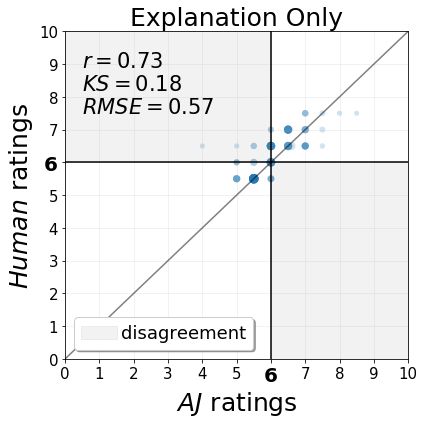

In [28]:
pa.correlation_newspapers(l_h[2], l_a[2], 'artificial', 'human', 'Explanation Only')